# Importación de librerías

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("NY_airbnb.csv")

# Exploración básica de datos

#### id: identificador del alojamiento
#### name: caraterísticas del alojamiento
#### host_i: identificador del hospedador
#### host_name: nombre del hospedador
#### neighbourhood_group: nombre del Borough (distrito)
#### neighbourhood: vecindario
#### latitude: latitud
#### longitude: longitud
#### room_type: tipo de alojamiento
#### price: precio por noche
#### minimum_nights: mínimo de noches
#### number_of_reviews: número de visitas
#### last_review: última visitas
#### reviews_per_month: visitas por mes
#### calculated_host_listings_count: cantidad de huespedes aceptados
#### availability_365: disponibilidad durante el año

In [5]:
# Ver las primeras cinco entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
# Ver el total de filas y columnas

df.shape

(48895, 16)

In [8]:
# Información sobre el dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
# Total de datos perdidos

df.isnull().sum(axis =0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Los datos faltantes de las columnas "name", "host_name", "review_per_month" y "number_of_review", por sus características propias, carecen de relevancia para el análisis requerido

In [11]:
# Verificación de la existencia de datos duplicados

df.duplicated().sum()

0

In [12]:
# Lista de los 5 Boroughs de NYC

df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [30]:
#Total de ofertas por ayuntamiento
#Bronx=1091

neighbourhood1 = df[df["neighbourhood_group"] == "Bronx"]

neighbourhood1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.35,2,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,36426093,Best room in nyc,273877318,Jay,Bronx,Claremont Village,40.83926,-73.91173,Private room,140,1,0,NaN,NaN,1,90
48792,36428186,Private house Apartment,141511069,Carolina,Bronx,Morrisania,40.83146,-73.89666,Entire home/apt,80,7,0,NaN,NaN,1,71
48795,36429652,Cute double room for the perfect Yankee fan,58222366,Dominique,Bronx,Claremont Village,40.83502,-73.91058,Private room,125,2,0,NaN,NaN,1,364
48796,36435986,1A. Studio & Stay. 30 minutes to Midtown Manha...,37678939,Chantal,Bronx,Concourse Village,40.83372,-73.91187,Private room,70,2,0,NaN,NaN,2,81


In [29]:
#Aca se muestra con que ayuntamiento vamos a trabajar, que en total son 5 

nhgroup = df.groupby("neighbourhood_group").count()

nhgroup 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [13]:
# Con groupby hemos agrupado la información de los 5 Boroughs con el fin de consolidar los datos y visualizar la concentración de la oferta 

df.groupby("neighbourhood_group")["neighbourhood_group"].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
# Total de vecindarios listados en los cinco Boroughs

len(df.neighbourhood.unique())

221

In [15]:
# Listado del total de vecindarios

df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [16]:
# Los 15 vecindarios con mayor concentración de demanda de alojamiento

df.neighbourhood.value_counts().head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [17]:
# Los quince principales propietarios de alojamientos vacacionales en los 5 Boroughs de NYC

top_host=df.host_id.value_counts().head(15)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

In [18]:
# Confirmación del propietrio con más oferta listada para alquiler vacacional

top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [19]:
top_host_check=df.calculated_host_listings_count.min()
top_host_check

1

In [20]:
# Total de la oferta por tipo de alojamiento

df.groupby("room_type")["room_type"].count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [21]:
# Media del precio por noche en los 5 Boroughs de NYC

df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [22]:
# Distribución por tipo de alojamiento y las distintas variables estadísticas del precio por cada uno los 5 Boroughs de NYC

df.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['count', 'min', 'max', 'mean' ,'median', 'std'])

count  min    max        mean  median  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379   28   1000  127.506596   100.0   
                    Private room       652    0   2500   66.788344    53.5   
                    Shared room         60   20    800   59.800000    40.0   
Brooklyn            Entire home/apt   9559    0  10000  178.327545   145.0   
                    Private room     10132    0   7500   76.500099    65.0   
                    Shared room        413    0    725   50.527845    36.0   
Manhattan           Entire home/apt  13199    0  10000  249.239109   191.0   
                    Private room      7982   10   9999  116.776622    90.0   
                    Shared room        480   10   1000   88.977083    69.0   
Queens              Entire home/apt   2096   10   2600  147.050573   120.0   
                    Private room      3372   10  10000   71.762456    60.0   
                    Shared room        198   11   1800   69.020202    37.0   
Staten Island       Entire home/apt    176   48   5000  173.846591   100.0   
                    Private room       188   20    300   62.292553    50.0   
                    Shared room          9   13    150   57.444444    30.0   

                                            std  
neighbourhood_group room_type                    
Bronx               Entire home/apt   95.027102  
                    Private room     107.009071  
                    Shared room      101.798871  
Brooklyn            Entire home/apt  226.415825  
                    Private room     124.713499  
                    Shared room       53.444485  
Manhattan           Entire home/apt  331.830132  
                    Private room     190.191318  
                    Shared room       92.416534  
Queens              Entire home/apt  129.383208  
                    Private room     180.506756  
                    Shared room      171.000607  
Staten Island       Entire home/apt  394.600216  
                    Private room      36.138245  
                    Shared room       45.119594

In [23]:
# Listado del precio máximo y mínimo en los 5 Boroughs de NYC

df.groupby('neighbourhood_group')['price'].agg(['min', 'max'])

,min,max
neighbourhood_group,,
Bronx,0,2500
Brooklyn,0,10000
Manhattan,0,10000
Queens,10,10000
Staten Island,13,5000


In [24]:
# Descarte de columnas 

df.drop(['id', "name", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count" ], axis=1)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,9
48891,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,36
48892,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,27
48893,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,2


In [25]:
df1 = df[["neighbourhood_group", "neighbourhood", "room_type", "price", "availability_365" ]]

df1

,neighbourhood_group,neighbourhood,room_type,price,availability_365
0,Brooklyn,Kensington,Private room,149,365
1,Manhattan,Midtown,Entire home/apt,225,355
2,Manhattan,Harlem,Private room,150,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,194
4,Manhattan,East Harlem,Entire home/apt,80,0
...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,9
48891,Brooklyn,Bushwick,Private room,40,36
48892,Manhattan,Harlem,Entire home/apt,115,27
48893,Manhattan,Hell's Kitchen,Shared room,55,2


In [26]:
df2 = df [["neighbourhood_group", "neighbourhood", "room_type", "price"]]

df2

,neighbourhood_group,neighbourhood,room_type,price
0,Brooklyn,Kensington,Private room,149
1,Manhattan,Midtown,Entire home/apt,225
2,Manhattan,Harlem,Private room,150
3,Brooklyn,Clinton Hill,Entire home/apt,89
4,Manhattan,East Harlem,Entire home/apt,80
...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70
48891,Brooklyn,Bushwick,Private room,40
48892,Manhattan,Harlem,Entire home/apt,115
48893,Manhattan,Hell's Kitchen,Shared room,55


In [27]:
df3 = df [["neighbourhood_group", "neighbourhood", "room_type"]]

df3

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [28]:
# Gráfica de los vecindarios más demandados

top_15 = df.neighbourhood.value_counts().head(15)
plt.figure(figsize=(8, 4))
x = list(top_10.index)
y = list(top_10.values)
x.reverse()
y.reverse()

plt.title('Neighbourhoods más demandados', size=20)
plt.ylabel('Number of hosts in this area')
plt.xlabel('Neighbourhood Area ')
plt.xticks( rotation='vertical', size=10)

plt.bar(x, y , color='blue')

NameError: name 'top_10' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
# Visualización de los quince principales propietarios de alojamientos vacacionales en los 5 Boroughs de NYC

sns.set(rc={'figure.figsize':(15,10)})
v1=top_host.plot(kind='bar')
v1.set_title('The 15 hosts with the most listings in NYC')
v1.set_ylabel('Count of listings')
v1.set_xlabel('Host IDs')
v1.set_xticklabels(viz_1.get_xticklabels(), rotation=30)

In [ ]:
# En los siguientes gráficos observamos los princpales tipos de alojamiento en los 15 vecindarios más demandados.
# La mayoría de los alojamientos más demandados se ubican en Manhattan y Brooklyn, siendo el home/apt la principal opción.


s1=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown', 'East Harlem', 'Greenpoint', 'Lower East Side', 'Astoria'])]

v2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=s1, kind='count')
v2.set_xticklabels(rotation=90)

In [ ]:
# Visualización de outliers con los precios promedios en los 5 Boroughs de NYC

red_square = dict(markerfacecolor='blue', markeredgecolor='blue', marker='.')
df.boxplot(column='price', by='neighbourhood_group', 
           flierprops=red_square, vert=False, figsize=(13,8))
plt.xlabel('\nMedian Price\n', fontsize=20)
plt.ylabel('\nDistrict\n', fontsize=20)
plt.title('\nPrecios por neighbourhood\n', fontsize=20, fontweight='bold')
plt.suptitle('')

In [ ]:
# Se han descartado los alojamientos con valor superior a $500  

s2=df[df.price < 500] 
v3=sns.violinplot(data=s2, x='neighbourhood_group', y='price')
v3.set_title('Distribución de precios por neighbourhood')

In [ ]:
# En la siguiente visualización podemos observar la distribución y concentración de la oferta de alojamiento en NYC

v4=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,8))
v4.legend()
v4.set_title('Distribución y concentración de la oferta de alojamiento en NYC')

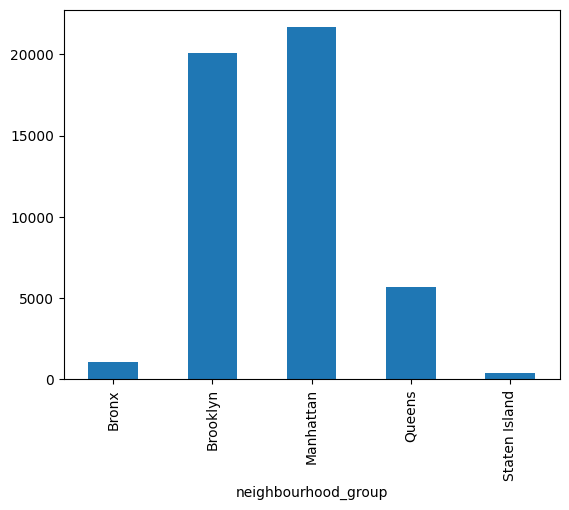

In [31]:
#Se realizo un grafico de Barras y determinamos que el ayuntamiento mas caro para alquiler es Manhattan
#Una de nuestras hipotesis es que el Bronx es un area de alquiler barato porque algunas de sus areas tienen alto nivel de violencia 


nhgroup["price"].plot(kind="bar")

plt.show()